# This simple project can detect the amount coins, and print on the image the total amount

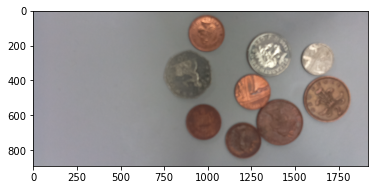

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
#import numpy before opencv
import numpy as np
import cv2

file_name = "test_image.png"

myimg = Image.open(file_name)
plt.imshow(myimg)

In [3]:
# here we did some filters to the image to make it easier in processing because colours will make it so difficult
original_image = cv2.imread(file_name, 1)
img = cv2.imread(file_name , cv2.IMREAD_GRAYSCALE)
img_update = cv2.GaussianBlur(img, (5,5), 0)

In [4]:
circles = cv2.HoughCircles(img_update,cv2.HOUGH_GRADIENT,0.9,120,param1=50,param2=27,minRadius=60,maxRadius=120)
# now we can print that, and see what we get
print(circles)

[[[1357.5  253.5  112.8]
  [1629.5  281.5   88.8]
  [ 994.5  132.5  108. ]
  [1203.5  742.5  103.1]
  [ 976.5  638.5   99.5]
  [1696.5  500.5  119.4]
  [1256.5  467.5  106.1]
  [1433.5  642.5  119.4]]]


In [5]:
circles = np.uint16(np.around(circles))
print(circles)
print(type(circles))

[[[1358  254  113]
  [1630  282   89]
  [ 994  132  108]
  [1204  742  103]
  [ 976  638  100]
  [1696  500  119]
  [1256  468  106]
  [1434  642  119]]]
<class 'numpy.ndarray'>


In [6]:
# this part just to view our work until now
count =1
for i in circles[0,:]:
    
    # draw the outer circle (file name , (circle location from circle object),size ,color , line thickness)
    cv2.circle(original_image,(i[0],i[1]),i[2],(0,255,0),2)
    
    # draw the center of the circle
    cv2.circle(original_image,(i[0],i[1]),2,(0,0,255),3)
    
    # draw the number of the circle
    #cv2.putText(original_image, str(count), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2)
    count +=1

In [7]:
def get_radius(nested):
    radius = []
    for i in nested[0,:]:
        radius.append(i[2])
    return radius


radii = get_radius(circles)
print(radii)

[113, 89, 108, 103, 100, 119, 106, 119]


In [8]:
def av_pix(img,circles,size):
    av_value = []
    for coords in circles[0,:]:
        col = np.mean(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
#         print(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
#         print('\n\n')
        av_value.append(col)
    return av_value 

bright_values = av_pix(img_update,circles,20)
print(bright_values)

[185.45375, 180.9975, 100.78625, 75.79375, 75.544375, 95.278125, 126.86625, 87.255]


In [9]:
values = []
for a,b in zip(bright_values,radii):
    if a > 150 and b > 110:
        values.append(10)
    elif a > 150 and b <= 110:
        values.append(5)
    elif a < 150 and b > 110:
        values.append(2)
    elif a < 150 and b < 110:
        values.append(1)        
print(values)  

[10, 5, 1, 1, 1, 2, 1, 2]


In [10]:
count_2 = 0
for i in circles[0,:]:
    
    cv2.putText(original_image, str(values[count_2]) + 'p',(i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)
    count_2 += 1

In [11]:
cv2.putText(original_image, 'ESTIMATED TOTAL VALUE: ' + str(sum(values)) + 'p', (200,100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255)

h = 44 # don't print

In [12]:
cv2.imshow('detected circles',original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()